# Probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src="https://drive.google.com/uc?id=1Fev1pOn8NeCpwIPW0VN2xaeLvj8nwbU8" width=320 height=640>

for example, let us random generate the numbers of trials($n_{ij}$)

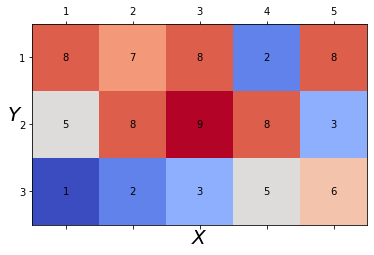

In [2]:
np.random.seed(777)
A = np.random.randint(1, 10, size=(3, 5))
fig, ax = plt.subplots(1, 1)
ax.matshow(A, cmap="coolwarm")

for (i, j), z in np.ndenumerate(A):
    ax.text(j, i, f"{z}", ha="center", va="center")
ax.set_xticklabels(np.arange(0, 6))
ax.set_yticklabels(np.arange(0, 4))
ax.set_xlabel("$X$", fontsize=20)
ax.set_ylabel("$Y$", fontsize=20).set_rotation(0)

plt.show()
# fig.savefig(str(fig_path/"1.2.3-probexample.png"))

so the probability of $p(X=x_i, Y=y_j)$ is following function.

In [3]:
def joint_probability(i, j, A):
    """
    i: index of x element 
    j: index of y element
    """
    return A[j, i] / A.sum()

# x_1, y_2 --> 5/83
p_x1y2 = joint_probability(0, 1, A)
print(round(p_x1y2, 4))

0.0602


In [4]:
def marginal_probability(k, A, axis=0):
    """
    k: either index of x element or index of y element
    """
    A_sum = A.sum(axis=axis)
    return A_sum[k] / A_sum.sum()

# x_1 --> (8 + 5 + 1) / 83
p_x1 = marginal_probability(0, A, axis=0)
print(round(p_x1, 4))

0.1687


In [5]:
def conditional_probability(i, j, A, axis=0):
    """
    i: index of x element, set axis=0 if it is a condition
    j: index of y element, set axis=1 if it is a condition
    """
    A_sum = A.sum(axis=axis)
    sel_dim = i if axis == 0 else j 
    return A[j, i] / A_sum[sel_dim]

# y_2 | x_1 --> 5 / (8 + 5 + 1)
p_y2_x1 = conditional_probability(0, 1, A, axis=0)
print(round(p_y2_x1, 4))

0.3571


## Appendix

PRML Exercises 1.4

* [prml-solution 1.4](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/05/prml-web-sol-2009-09-08.pdf)
* [prml-errata](https://yousuketakada.github.io/prml_errata/prml_errata.pdf)

In [6]:
def g(y):
    """x = g(y)"""
    return np.log(y) - np.log(1-y) + 5

def g_inv(x):
    """y = g^{-1}(x)"""
    return 1 / (1 + np.exp(-x + 5))

def gaussian(x, mu, sigma):
    """p(x)"""
    return (1/sigma*np.sqrt(2*np.pi)) * np.exp((-1/2)*((x-mu)/sigma)**2)

def dxdy(y):
    return 1 / (y - y**2)

def scaler(x):
    """for drawing"""
    x_max = x.max()
    x_min = x.min()
    return (x - x_min) / (x_max - x_min)

In [145]:
np.random.seed(88)
N = 50000
mu = 6.0
sigma = 1.0

sampled_x = np.random.normal(loc=mu, scale=sigma, size=(N,))
sampled_y = g_inv(sampled_x)

x = np.linspace(0, 10, N)
y = g_inv(x)

px = gaussian(x, mu, sigma)
py = gaussian(g(y), mu, sigma)
py_real = px * np.abs(dxdy(y))

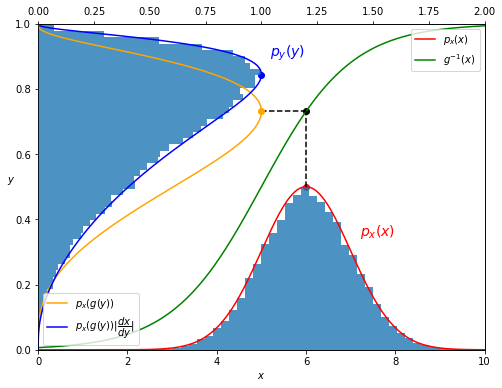

In [57]:
fig, ax= plt.subplots(1, 1, figsize=(8, 6))
n, bins, patches = ax.hist(sampled_x, bins=50, alpha=0.8)
p_bins = np.array([p.get_height() for p in patches])
p_bins_normed = 0.5*scaler(p_bins)
for i, p in enumerate(patches):
    p.set_height(p_bins_normed[i])
    
px_normed = 0.5*scaler(px)  # normalize to 0~.5
ax.plot(x, px_normed, c="r", label="$p_x(x)$")
ax.plot(x, g_inv(x), c="g", label="$g^{-1}(x)$")

ax.set_ylim(0, 1)
ax.set_xlim(0, 10)

ax2 = ax.twiny()
n, bins, patches = ax2.hist(sampled_y, bins=50, alpha=0.8, orientation="horizontal")
p_bins = np.array([p.get_width() for p in patches])
p_bins_normed = scaler(p_bins)
for i, p in enumerate(patches):
    p.set_width(p_bins_normed[i])
    
py_normed = scaler(py)
ax2.set_xlim(0, 2)
ax2.plot(py_normed, y, label="$p_x(g(y))$", c="orange")

py_real_normed = scaler(py_real)
yy = np.linspace(0, 1, len(p_bins_normed))
ax2.plot(py_real_normed, y, c="b", label="$p_x(g(y)) | \dfrac{dx}{dy} | $")

ax2.legend(loc=3)
ax.legend(loc=1)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$", rotation=0)
ax.annotate("$p_y(y)$", (5.2, 0.9), fontsize=14, c="b")
ax.annotate("$p_x(x)$", (7.2, 0.35), fontsize=14, c="r")
ax.scatter(mu, px_normed.max(), c="r")
ax.scatter(mu, g_inv(mu), c="k")
ax.plot((mu, mu), (px_normed.max(), y[py_normed.argmax()]), "k--")
ax.plot((5, mu), (y[py_normed.argmax()], y[py_normed.argmax()]), "k--")
ax2.scatter(py_normed.max(), y[py_normed.argmax()], c="orange")
ax2.scatter(py_real_normed.max(), y[py_real_normed.argmax()], c="b")
plt.show()

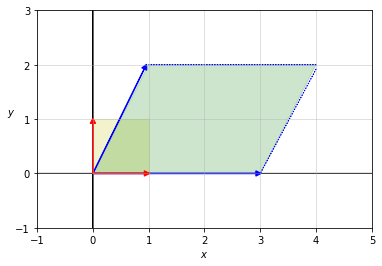

In [110]:
plt.grid("on", alpha=0.5)
a = 0.08
plt.arrow(-2, 0, 10, 0, width=0.001, linestyle="-", ec='k')
plt.arrow(0, -2, 0, 10, width=0.001, linestyle="-", ec='k')
plt.arrow(0, 0, 3-a, 0, width=0.01, head_width=0.1, head_length=0.1, fc='b', ec='b')
plt.arrow(0, 0, 1-a, 2-a, width=0.01, head_width=0.1, head_length=0.1, fc='b', ec='b')
plt.arrow(0, 0, 0, 1-a, width=0.01, head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.arrow(0, 0, 1-a, 0, width=0.01, head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.arrow(1, 2, 3, 0, width=0.001, linestyle=":", ec='b')
plt.arrow(3, 0, 1, 2-a, width=0.001, linestyle=":", ec='b')
plt.fill((0, 1, 1, 0), (0, 0, 1, 1), c="y", alpha=0.2)
plt.fill((0, 1, 4, 3), (0, 2, 2, 0), c="g", alpha=0.2)
plt.xticks(np.arange(-1, 6))
plt.yticks(np.arange(-1, 6))
plt.xlim(-1, 5)
plt.ylim(-1, 3)
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()

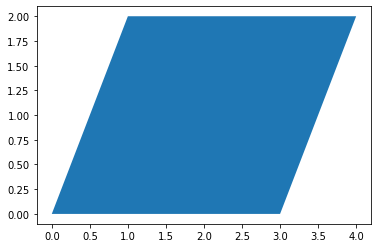

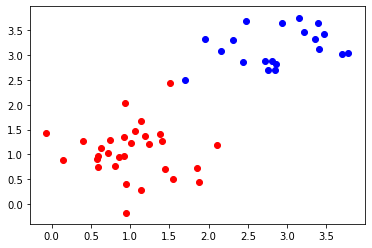

In [95]:
np.random.seed(99)
x1 = np.random.normal(1.0, .5, size=(30, 2))
x2 = np.random.normal(3.0, .5, size=(20, 2))
plt.scatter(x1[:, 0], x1[:, 1], label="x1", c="r")
plt.scatter(x2[:, 0], x2[:, 1], label="x2", c="b")
plt.show()

In [96]:
rng = [-0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
X = np.concatenate((x1, x2))
X_prob_cnt = []
for a, b in zip(rng[:-1], rng[1:]):
    cnt = 0
    for x in sorted(X[:, 0]):
        if x <= b and x > a:
            cnt += 1
    print(a, b, cnt)
    X_prob_cnt.append(cnt)
X_prob_cnt

-0.5 0 1
0 0.5 2
0.5 1.0 13
1.0 1.5 9
1.5 2.0 6
2.0 2.5 5
2.5 3.0 6
3.0 3.5 6
3.5 4.0 2


[1, 2, 13, 9, 6, 5, 6, 6, 2]

<BarContainer object of 9 artists>

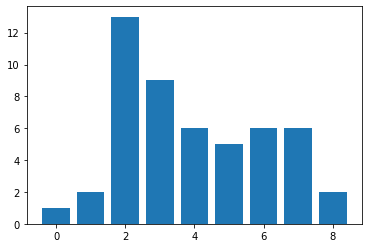

In [97]:
plt.bar(np.arange(len(X_prob_cnt)), height=X_prob_cnt)

In [98]:
x1_max = x1[:, 1].max()
x2_min = x2[:, 1].min()
assert x1_max < x2_min, "조건을 만족해야합니다."

In [99]:
Y_prob_cnt = []
cnt1 = 0
cnt2 = 0
for y in sorted(X[:, 1]):
    if y <= x1_max:
        cnt1 += 1
    else:
        cnt2 += 1
Y_prob_cnt.append(cnt1)
Y_prob_cnt.append(cnt2)
Y_prob_cnt

[30, 20]

<BarContainer object of 2 artists>

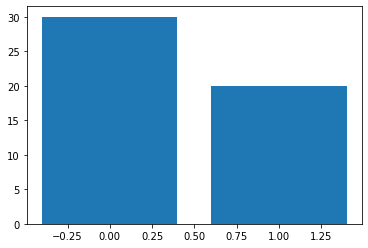

In [100]:
plt.bar(np.arange(len(Y_prob_cnt)), height=Y_prob_cnt)

In [101]:
rng

[-0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

In [102]:
X = np.concatenate((x1, x2))
XY_prob_cnt = []
for a, b in zip(rng[:-1], rng[1:]):
    cnt = 0
    for x, y in X:
        if x <= b and x > a and y <= x1_max:
            cnt += 1
    XY_prob_cnt.append(cnt)

In [103]:
XY_prob_cnt

[1, 2, 13, 9, 4, 1, 0, 0, 0]

<BarContainer object of 9 artists>

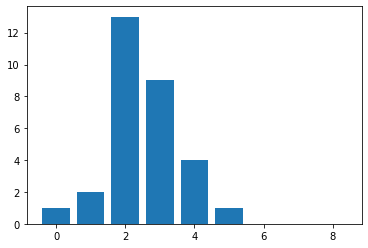

In [104]:
plt.bar(np.arange(len(XY_prob_cnt)), height=XY_prob_cnt)

<BarContainer object of 9 artists>

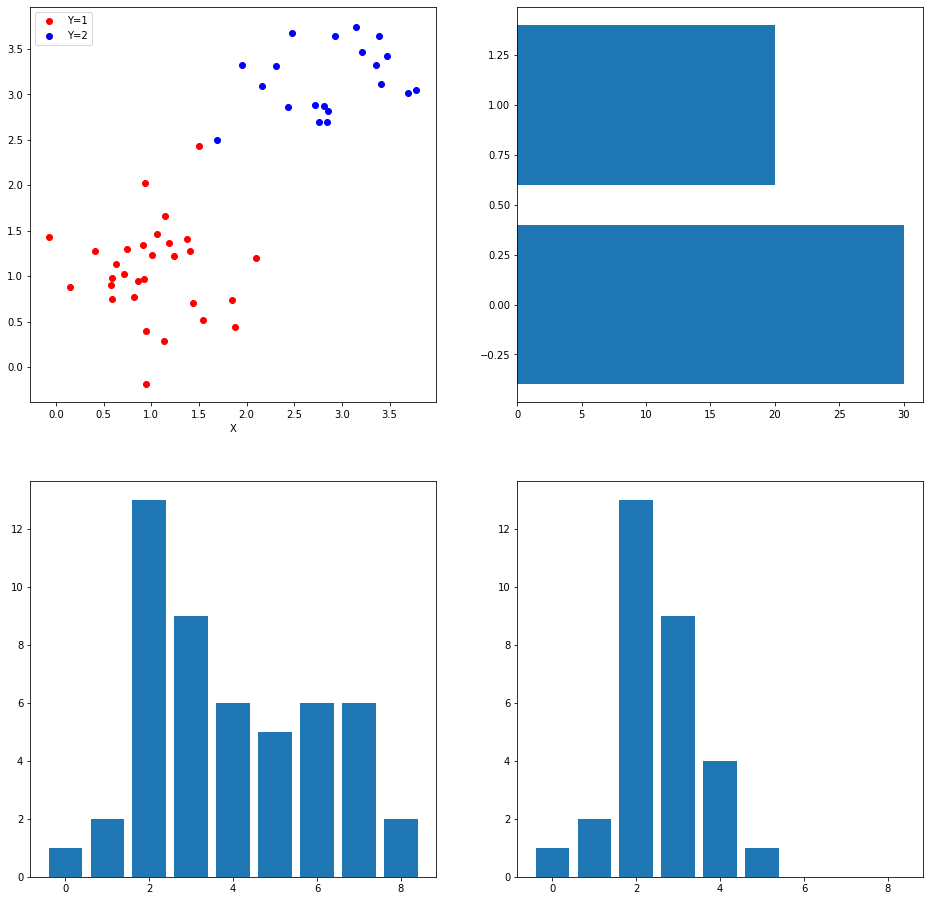

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
(ax1, ax2), (ax3, ax4) = axes
ax1.scatter(x1[:, 0], x1[:, 1], label="Y=1", c="r")
ax1.scatter(x2[:, 0], x2[:, 1], label="Y=2", c="b")
ax1.legend(loc="upper left")
ax1.set_xlabel("X")
ax2.barh(np.arange(len(Y_prob_cnt)), width=Y_prob_cnt)
ax3.bar(np.arange(len(X_prob_cnt)), height=X_prob_cnt)
ax4.bar(np.arange(len(XY_prob_cnt)), height=XY_prob_cnt)

MLE

In [1]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def binomial(theta, n, x):
    """
    theta: probability
    n: number of trials
    x: number of value that random variable X can be
    """
    return comb(n, x) * (theta**x) * (1-theta)**(n-x)

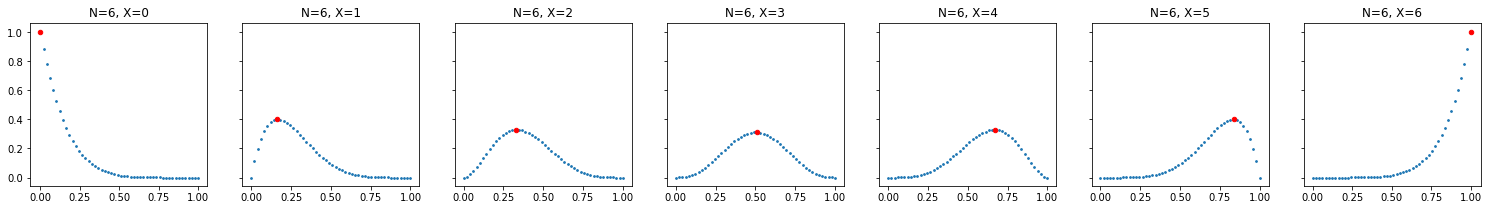

In [3]:
probs = np.linspace(0, 1, num=50)
N = 6
X = np.arange(0, N+1)

H = N // 6
fig, axes = plt.subplots(1, N+1, figsize=(26, 3), sharey=True)
for x, ax in zip(X, axes):
    L = binomial(probs, N, x)
    max_y, max_x = L.max(), probs[L.argmax()]
    ax.scatter(probs, L, s=3)
    ax.scatter(max_x, max_y, s=20, c="red")
    ax.set_title(f"N={N}, X={x}")
plt.show()

In [4]:
def normal_dist(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(1/(2*sigma**2))*(x-mu)**2)

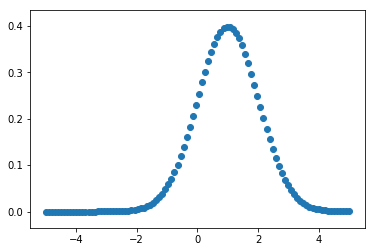

In [5]:
delta = 0.01
X = np.linspace(-5, 5, 100)
mu, sigma = 1, 1
Y = normal_dist(X, mu, sigma)
plt.scatter(X, Y)
plt.show()

## Binomial - Bayesian